# Cohort Analysis

Cohort analysis is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable wa

In [1]:
import pandas as pd

data = pd.read_csv("cohorts.csv")
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


In [2]:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


In [3]:
data_types = data.dtypes
print(data_types)

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object


In [4]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [5]:
# Display the descriptive statistics of the dataset
descriptive_stats = data.describe()
print(descriptive_stats)

         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.000000       784.000000       59.047619        0.000000
25%    3069.000000      1131.500000      182.974287       68.488971
50%    3514.500000      1388.000000      206.356554      146.381667
75%    3829.500000      1543.750000      230.671046      220.021875
max    4790.000000      1766.000000      445.872340      304.350000


In [7]:

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
# Trend analysis for New and Returning Users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

# Returning Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show()

pio.write_image(fig, 'trend_analysis.png')


In [9]:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show()
pio.write_image(fig, 'Trend of Duration (Day 1 and Day 7) Over Time.png')


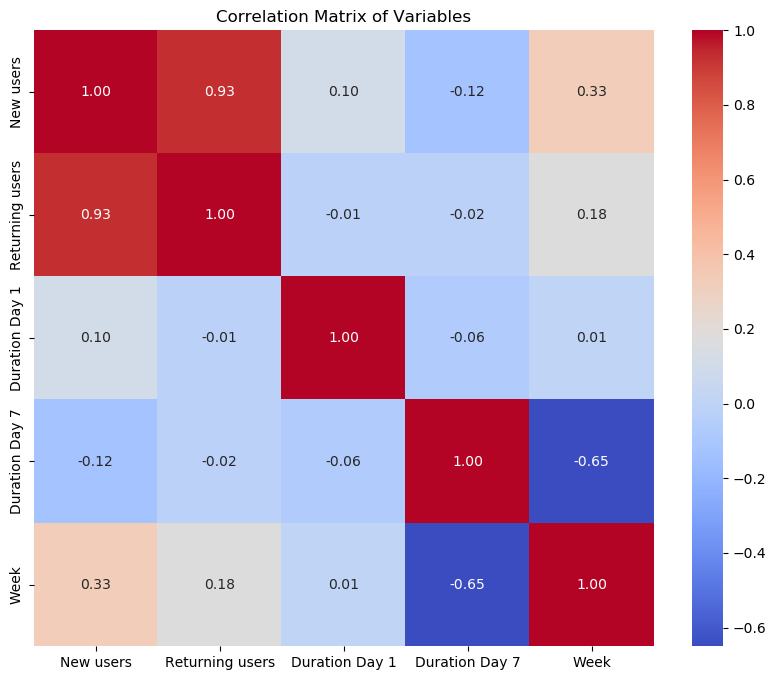

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.savefig('correlation_matrix_plot.png')
plt.show()

In [12]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

print(weekly_averages.head())

   Week    New users  Returning users  Duration Day 1  Duration Day 7
0    43  3061.800000      1267.800000      220.324375      225.185602
1    44  3503.571429      1433.142857      189.088881      168.723200
2    45  3297.571429      1285.714286      198.426524      143.246721
3    46  3222.428571      1250.000000      248.123542      110.199609
4    47  4267.750000      1616.250000      174.173330        0.000000


In [21]:
import plotly.express as px
import plotly.io as pio

# Create the first figure
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

# Create the second figure
fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

# Save the first figure
pio.write_image(fig1, 'weekly_average_new_vs_returning_users.png')

# Save the second figure
pio.write_image(fig2, 'weekly_average_duration_day1_vs_day7.png')

fig1.show()
fig2.show()

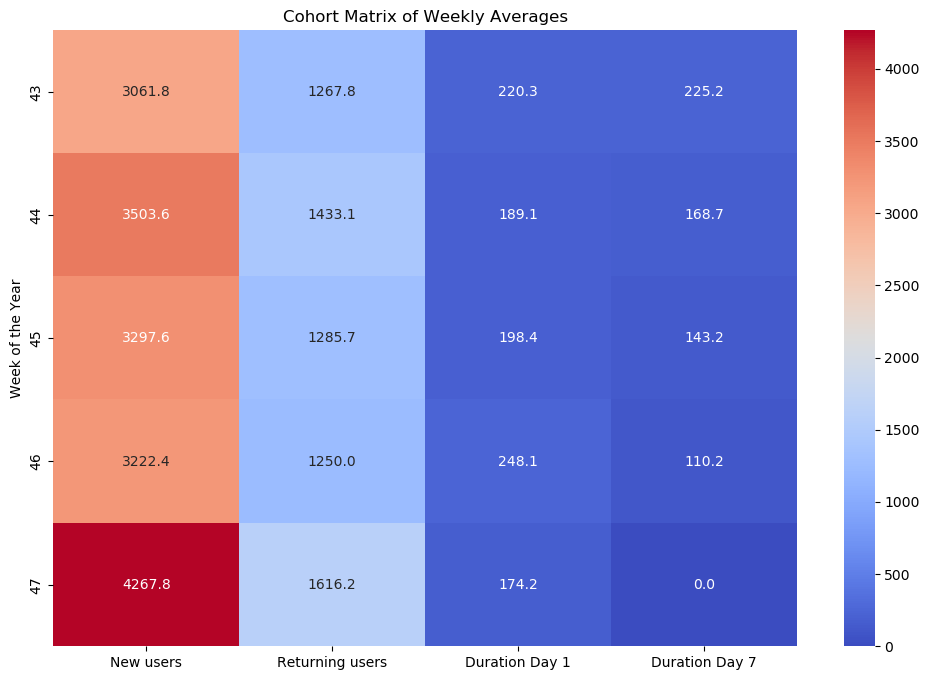

<Figure size 640x480 with 0 Axes>

In [22]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()
plt.savefig("Cohort Matrix of Weekly Averages")


We can see that the number of new users and returning users fluctuates from week to week.
 Notably, there was a significant increase in both new and returning users in Week 47. The average duration of user engagement on Day 1 and Day 7 varies across the weeks.
 The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.

Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. I hope you liked this article on Cohort Analysis using Python. Feel free to ask valuable questions in the comments section below.